In [2]:
## **GRADE PREDICTION**


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
grade_pred=pd.read_csv("grade_prediction.csv")

In [5]:
grade_pred.shape

(395, 33)

In [6]:
grade_pred.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [7]:
grade_pred.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
grade_pred.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
grade_pred.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
grade_pred.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


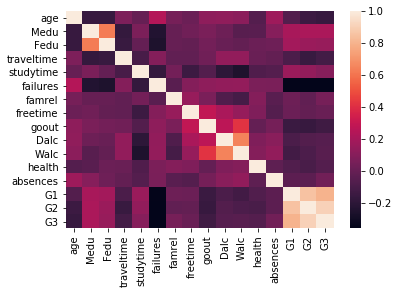

In [11]:
corr=grade_pred.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [12]:
grade_pred.school.unique()

array(['GP', 'MS'], dtype=object)

In [13]:
sc_gp = grade_pred[grade_pred['school']=='GP']['G3'].value_counts()
sc_ms = grade_pred[grade_pred['school']=='MS']['G3'].value_counts()
sc_df = pd.DataFrame([sc_gp, sc_ms], index=['School GP', 'School MS'])
sc_df = sc_df.T

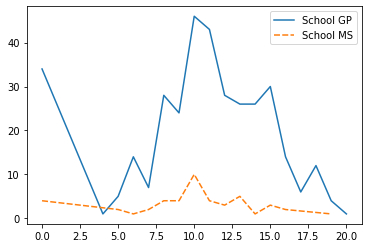

In [14]:
sns.lineplot(data=sc_df)

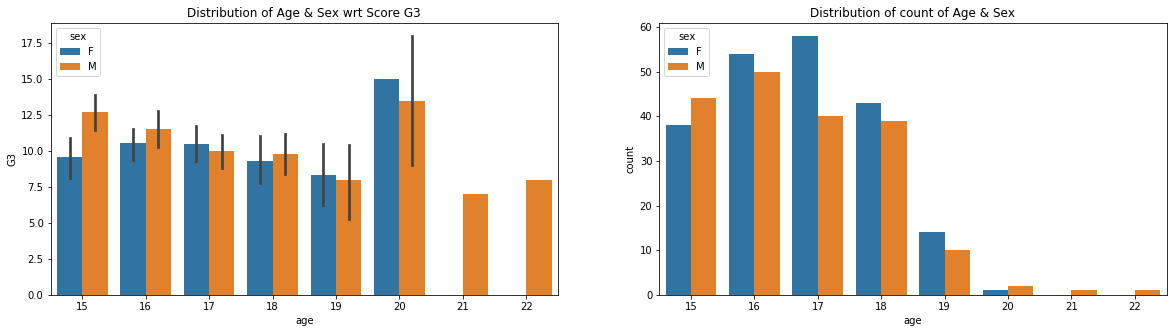

In [15]:
fg, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].set_title('Distribution of Age & Sex wrt Score G3')
sns.barplot(x='age', y='G3', hue='sex', data=grade_pred, ax=axs[0])

axs[1].set_title('Distribution of count of Age & Sex')
sns.countplot(x='age', hue='sex', data=grade_pred, ax=axs[1])

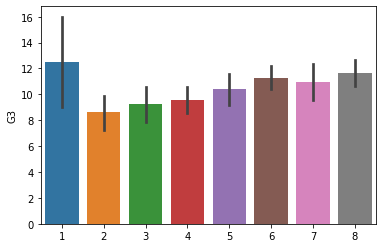

In [16]:
fam_edu = grade_pred['Fedu'] + grade_pred['Medu']
sns.barplot(x=fam_edu, y='G3', data=grade_pred)

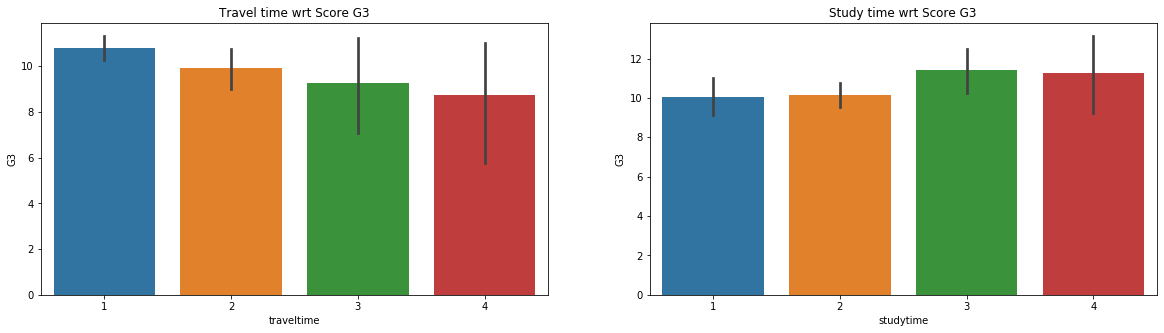

In [17]:
fg, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].set_title('Travel time wrt Score G3')
sns.barplot(x='traveltime', y='G3', data=grade_pred, ax=axs[0])

axs[1].set_title('Study time wrt Score G3')
sns.barplot(x='studytime', y='G3', data=grade_pred, ax=axs[1])

Text(0.5, 0, 'Romantic Relation')

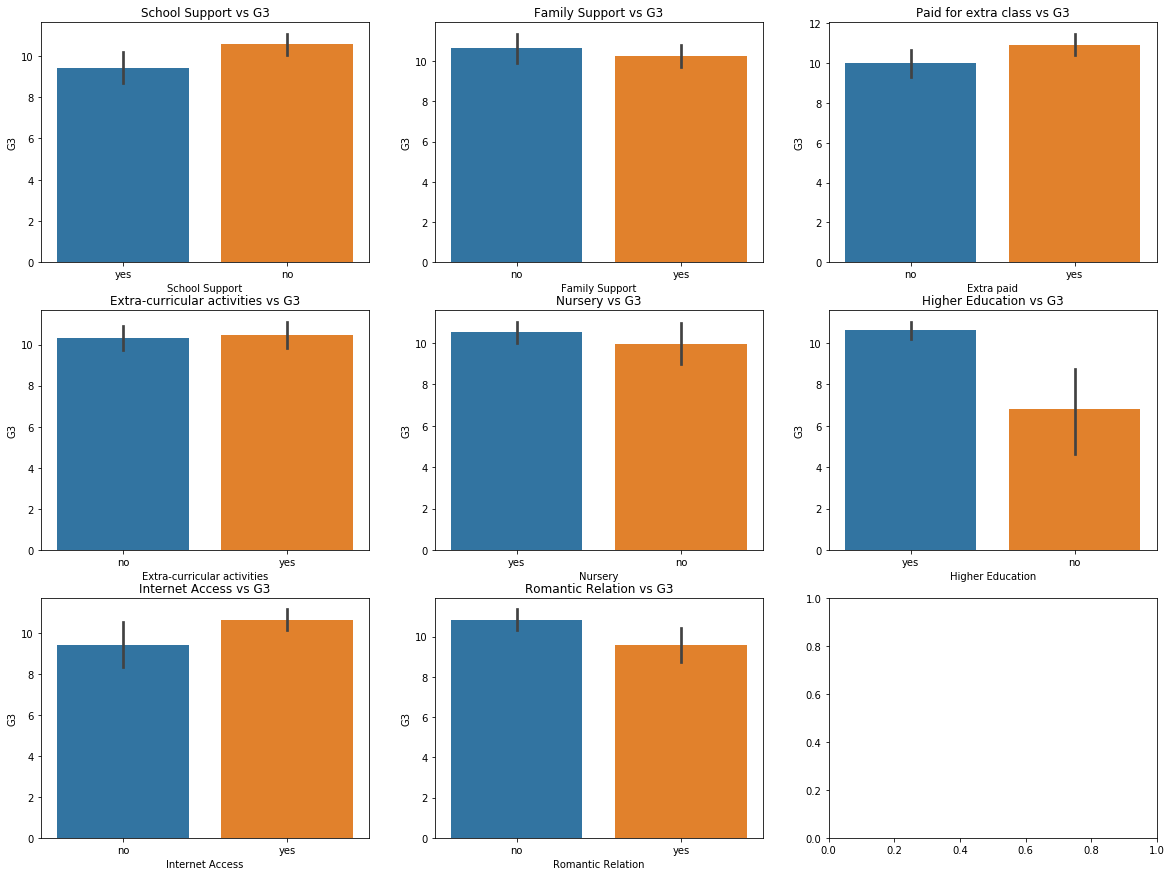

In [18]:
fg, axs = plt.subplots(3,3, figsize=(20,15))

axs[0,0].set_title('School Support vs G3')
sns.barplot(x='schoolsup', y='G3', data=grade_pred, ax=axs[0,0])
axs[0,0].set_xlabel('School Support')

axs[0,1].set_title('Family Support vs G3')
sns.barplot(x='famsup', y='G3', data=grade_pred, ax=axs[0,1])
axs[0,1].set_xlabel('Family Support')

axs[0,2].set_title('Paid for extra class vs G3')
sns.barplot(x='paid', y='G3', data=grade_pred, ax=axs[0,2])
axs[0,2].set_xlabel('Extra paid')

axs[1,0].set_title('Extra-curricular activities vs G3')
sns.barplot(x='activities', y='G3', data=grade_pred, ax=axs[1,0])
axs[1,0].set_xlabel('Extra-curricular activities')

axs[1,1].set_title('Nursery vs G3')
sns.barplot(x='nursery', y='G3', data=grade_pred, ax=axs[1,1])
axs[1,1].set_xlabel('Nursery')

axs[1,2].set_title('Higher Education vs G3')
sns.barplot(x='higher', y='G3', data=grade_pred, ax=axs[1,2])
axs[1,2].set_xlabel('Higher Education')

axs[2,0].set_title('Internet Access vs G3')
sns.barplot(x='internet', y='G3', data=grade_pred, ax=axs[2,0])
axs[2,0].set_xlabel('Internet Access')

axs[2,1].set_title('Romantic Relation vs G3')
sns.barplot(x='romantic', y='G3', data=grade_pred, ax=axs[2,1])
axs[2,1].set_xlabel('Romantic Relation')

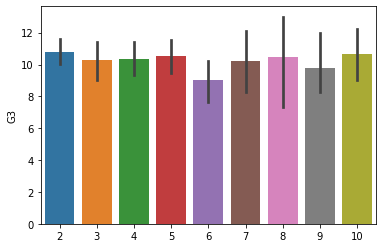

In [19]:
alc = grade_pred['Dalc'] + grade_pred['Walc']
sns.barplot(x=alc, y='G3', data=grade_pred)

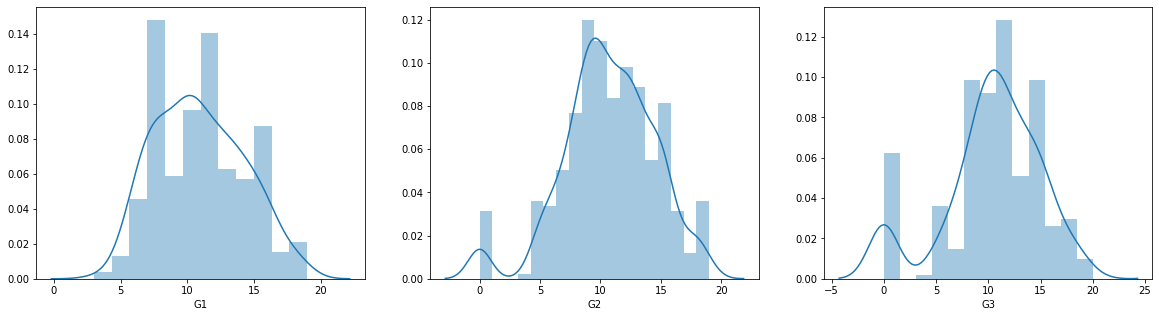

In [20]:
fg, axs = plt.subplots(1, 3, figsize=(20, 5))
g1 = sns.distplot(grade_pred['G1'], ax=axs[0])
g2 = sns.distplot(grade_pred['G2'], ax=axs[1])
g3 = sns.distplot(grade_pred['G3'], ax=axs[2])

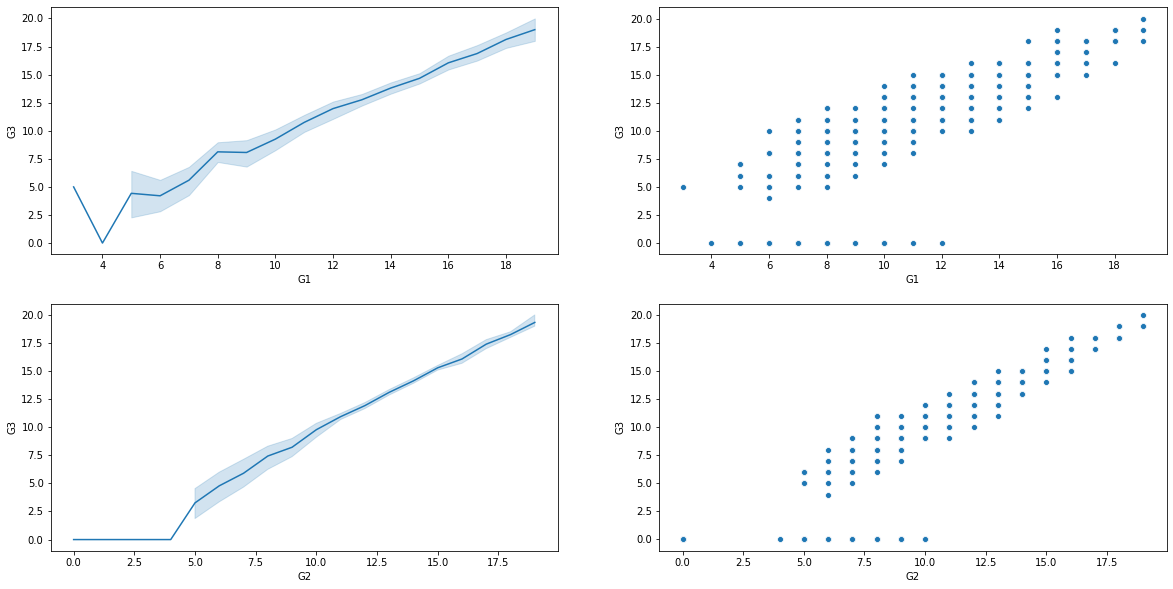

In [21]:
fg, axs = plt.subplots(2,2, figsize=(20,10))
b1 = sns.lineplot(x='G1', y='G3', data=grade_pred, ax=axs[0,0])
b2 = sns.scatterplot(x='G1', y='G3', data=grade_pred, ax=axs[0,1])
b3 = sns.lineplot(x='G2', y='G3', data=grade_pred, ax=axs[1,0])
b4 = sns.scatterplot(x='G2', y='G3', data=grade_pred, ax=axs[1,1])

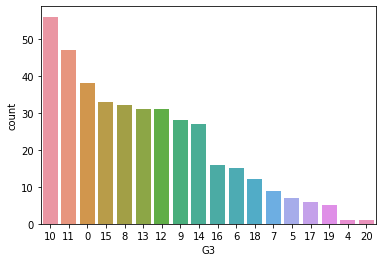

In [22]:
sns.countplot(x='G3', data=grade_pred, order=grade_pred['G3'].value_counts().index)

In [23]:
sch_map = {'GP':0, 'MS':1}
grade_pred['school'] = grade_pred['school'].map(sch_map)

In [24]:
sex_map = {'F':0, 'M':1}
grade_pred['sex'] = grade_pred['sex'].map(sex_map)

In [25]:
fmap = {'LE3':0, 'GT3':1}
grade_pred['famsize'] = grade_pred['famsize'].map(fmap)

In [26]:
fmap = {'U':0, 'R':1}
grade_pred['address'] = grade_pred['address'].map(fmap)

In [27]:
fmap = {'LE3':0, 'GT3':1}
grade_pred['famsize'] = grade_pred['famsize'].map(fmap)


In [28]:
fmap = {'T':0, 'A':1}
grade_pred['Pstatus'] = grade_pred['Pstatus'].map(fmap)

In [29]:
fmap = {'services':0, 'at_home':1, 'teacher':2, 'health':3, 'other':4}
grade_pred['Mjob'] = grade_pred['Mjob'].map(fmap)
grade_pred['Fjob'] = grade_pred['Fjob'].map(fmap)

In [30]:
fmap = {'course':0, 'home':1, 'reputation':2, 'other':3}
grade_pred['reason'] = grade_pred['reason'].map(fmap)


In [31]:
fmap = {'mother':0, 'father':1, 'other':2}
grade_pred['guardian'] = grade_pred['guardian'].map(fmap)

In [32]:
fmap = {'no':0,'yes':1}
grade_pred['schoolsup'] = grade_pred['schoolsup'].map(fmap)
grade_pred['famsup'] = grade_pred['famsup'].map(fmap)
grade_pred['paid'] = grade_pred['paid'].map(fmap)
grade_pred['activities'] = grade_pred['activities'].map(fmap)
grade_pred['nursery'] = grade_pred['nursery'].map(fmap)
grade_pred['higher'] = grade_pred['higher'].map(fmap)
grade_pred['internet'] = grade_pred['internet'].map(fmap)
grade_pred['romantic'] = grade_pred['romantic'].map(fmap)

In [33]:
grade_pred.drop(['famsize'],axis=1,inplace=True)

In [34]:
X = grade_pred.iloc[:, :31]
y = grade_pred.iloc[:, -1]


In [35]:
X.head()

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,1,4,4,1,2,0,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,0,0,1,1,1,4,0,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,0,0,1,1,1,4,3,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,0,0,4,2,3,0,1,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,0,0,3,3,4,4,1,...,0,4,3,2,1,2,5,4,6,10


In [36]:
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [37]:
grade_pred.corr()

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,0.279797,-0.045923,-0.133333,-0.079807,0.029167,-0.109010,-0.013689,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,0.028504,-0.023443,0.078228,0.034878,0.030471,0.018850,-0.061885,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,0.146722,-0.029598,-0.163658,-0.163438,-0.010303,-0.040617,0.003435,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,0.279797,0.028504,0.146722,1.000000,-0.042572,-0.138804,-0.072178,0.006076,0.038536,0.035882,...,-0.014258,-0.034878,-0.068835,0.093494,0.101126,0.040355,0.027874,-0.069704,-0.126037,-0.105756
Pstatus,-0.045923,-0.023443,-0.029598,-0.042572,1.000000,0.123565,0.088730,-0.006548,0.047829,-0.002681,...,-0.025179,-0.038717,-0.003459,0.030590,-0.006045,-0.022307,0.134937,0.016868,0.041382,0.058009
Medu,-0.133333,0.078228,-0.163658,-0.138804,0.123565,1.000000,0.623455,-0.035604,-0.026635,0.097743,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,-0.072178,0.088730,0.623455,1.000000,-0.076127,-0.129611,0.026469,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,0.029167,0.030471,-0.010303,0.006076,-0.006548,-0.035604,-0.076127,1.000000,0.247500,0.019955,...,-0.020960,-0.000012,0.010341,-0.007863,-0.011819,-0.038105,0.016773,-0.109129,-0.056463,-0.053363
Fjob,-0.109010,0.018850,-0.040617,0.038536,0.047829,-0.026635,-0.129611,0.247500,1.000000,-0.030182,...,-0.011661,0.032330,0.034900,-0.101276,-0.010159,0.030448,0.006107,-0.059030,-0.058964,-0.013496
reason,-0.013689,-0.061885,0.003435,0.035882,-0.002681,0.097743,0.026469,0.019955,-0.030182,1.000000,...,-0.023338,-0.047250,-0.049140,0.038902,0.009260,-0.124075,0.109238,0.074354,0.116545,0.120454


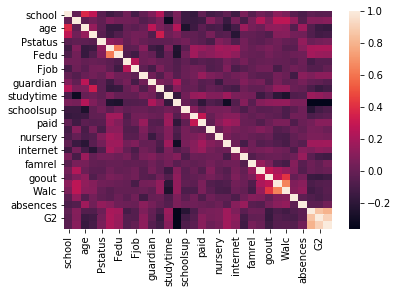

In [38]:
sns.heatmap(grade_pred.corr())

In [41]:
pd.set_option('display.max_columns', None)
grade_pred.head()

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,4,4,1,2,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,4,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,1,1,1,4,3,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,4,2,3,0,1,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,3,3,4,4,1,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [40]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 31), (79, 31), (316,), (79,))

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [41]:
##Hyper Parameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [42]:
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [45]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [47]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [48]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   58.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [49]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [50]:
rf_random.best_score_

-2.3506330047715505

In [51]:
predictions=rf_random.predict(X_test)

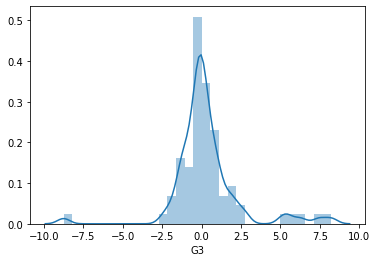

In [52]:
sns.distplot(y_test-predictions)

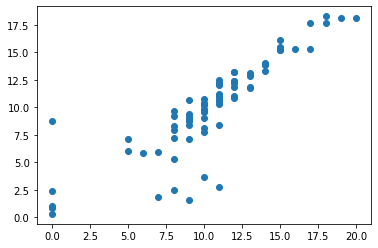

In [53]:
plt.scatter(y_test,predictions)

In [54]:
from sklearn import metrics

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2314510457014984
MSE: 4.715214998417328
RMSE: 2.1714545812467105


In [57]:
import pickle
# open a file, where you ant to store the data
file = open('grade_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)